In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import random
from pprint import pprint

In [ ]:
df = pd.read_csv('/content/data.csv')
df = df[['oldpeak', 'ca', 'cp', 'exang', 'thal', 'num']]
df

FileNotFoundError: ignored

In [ ]:
df['label'] = df.num
df = df.drop("num", axis=1)
df

,oldpeak,ca,cp,exang,thal,label
0,2.3,0.0,1,0,6.0,0
1,1.5,3.0,4,1,3.0,2
2,2.6,2.0,4,1,7.0,1
3,3.5,0.0,3,0,3.0,0
4,1.4,0.0,2,0,3.0,0
...,...,...,...,...,...,...
298,1.2,0.0,1,0,7.0,1
299,3.4,2.0,4,0,7.0,2
300,1.2,1.0,4,1,7.0,3
301,0.0,1.0,2,0,3.0,1


In [ ]:
df.columns

Index(['oldpeak', 'ca', 'cp', 'exang', 'thal', 'label'], dtype='object')

In [ ]:
column_names = []
for column in df.columns:
  name = column.replace(" ","_")
  column_names.append(name)
df.columns = column_names
df.head()

,oldpeak,ca,cp,exang,thal,label
0,2.3,0.0,1,0,6.0,0
1,1.5,3.0,4,1,3.0,2
2,2.6,2.0,4,1,7.0,1
3,3.5,0.0,3,0,3.0,0
4,1.4,0.0,2,0,3.0,0


<Axes: >

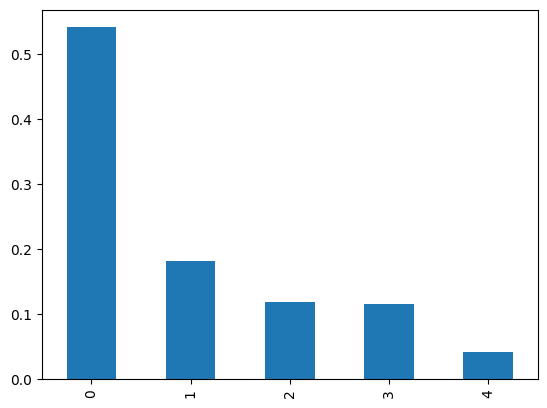

In [ ]:
heart_disease = df.label.value_counts(normalize=True)
heart_disease = heart_disease.sort_index()
heart_disease.plot(kind="bar")

In [ ]:
from matplotlib.artist import TransformedBbox
def transform_label(value):
  if value == 0:
    return "No heart disease"
  else:
    return "Have heart disease"
df['label'] = df.label.apply(transform_label)

No heart disease      0.541254
Have heart disease    0.458746
Name: label, dtype: float64

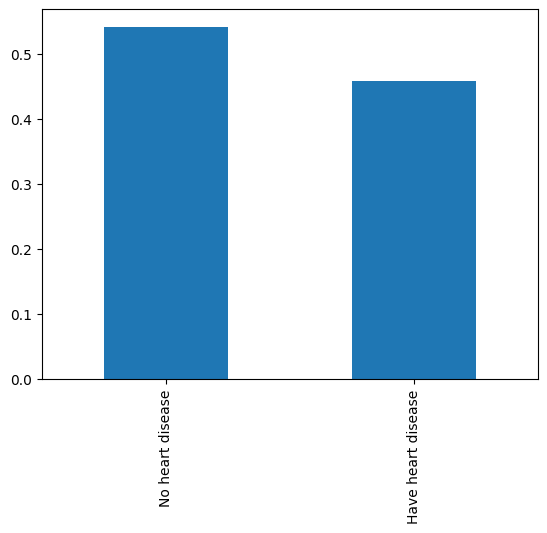

In [ ]:
heart_disease = df.label.value_counts(normalize=True)
heart_disease[["No heart disease","Have heart disease"]].plot(kind="bar")
heart_disease

In [ ]:
def train_test_split(df, test_size):

    if isinstance(test_size, float):
        test_size = round(test_size * len(df))

    indices = df.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_df = df.loc[test_indices]
    train_df = df.drop(test_indices)

    return train_df, test_df

In [ ]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size=0.1)

In [ ]:
train_df

,oldpeak,ca,cp,exang,thal,label
0,2.3,0.0,1,0,6.0,No heart disease
1,1.5,3.0,4,1,3.0,Have heart disease
2,2.6,2.0,4,1,7.0,Have heart disease
3,3.5,0.0,3,0,3.0,No heart disease
4,1.4,0.0,2,0,3.0,No heart disease
...,...,...,...,...,...,...
297,0.2,0.0,4,1,7.0,Have heart disease
299,3.4,2.0,4,0,7.0,Have heart disease
300,1.2,1.0,4,1,7.0,Have heart disease
301,0.0,1.0,2,0,3.0,Have heart disease


In [ ]:
test_df

,oldpeak,ca,cp,exang,thal,label
197,0.2,0.0,4,1,3.0,No heart disease
215,1.9,0.0,1,0,7.0,No heart disease
20,1.8,0.0,1,1,3.0,No heart disease
132,0.0,0.0,2,0,3.0,No heart disease
261,0.0,2.0,2,0,3.0,Have heart disease
248,1.0,2.0,4,0,7.0,Have heart disease
207,0.9,0.0,4,1,7.0,Have heart disease
155,2.4,3.0,4,0,3.0,Have heart disease
244,0.0,0.0,3,0,3.0,No heart disease
183,4.2,0.0,1,0,7.0,No heart disease


In [ ]:
len(test_df)

30

In [ ]:
def bootstrapping(train_df, n_bootstrap):
  bootstrap_indices = np.random.randint(low=0, high=len(train_df), size=n_bootstrap)
  df_bootstrapped = train_df.iloc[bootstrap_indices]
  return df_bootstrapped

In [ ]:
bootstrapping(train_df, n_bootstrap=1000)

,oldpeak,ca,cp,exang,thal,label
237,0.8,0.0,4,0,7.0,Have heart disease
156,1.6,0.0,4,1,7.0,Have heart disease
267,2.2,1.0,3,0,6.0,Have heart disease
296,1.0,2.0,4,0,6.0,Have heart disease
14,0.5,0.0,3,0,7.0,No heart disease
...,...,...,...,...,...,...
220,0.0,0.0,3,1,3.0,No heart disease
195,0.9,2.0,4,1,3.0,Have heart disease
182,0.8,2.0,1,0,3.0,No heart disease
268,0.0,0.0,4,0,7.0,Have heart disease


In [ ]:
def determine_type_of_feature(df):

    feature_types = []
    n_unique_values_treshold = 15
    for feature in df.columns:
        if feature != "label":
            unique_values = df[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")

    return feature_types

In [ ]:
def check_purity(data):

    label_column = data[:, -1]
    unique_classes = np.unique(label_column)
    # print(len(unique_classes))

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [ ]:
def classify_data(data):

    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    # print("classification:", classification)

    return classification

In [ ]:
def get_potential_splits(data, random_subspace):

    potential_splits = {}
    _, n_columns = data.shape
    colum_indices = list(range(n_columns - 1))
    # print(colum_indices)

    if random_subspace and random_subspace <= len(colum_indices):
      colum_indices = random.sample(population=colum_indices, k=random_subspace)

    for column_index in colum_indices:  # excluding the last column which is the label
        values = data[:, column_index]
        unique_values = np.unique(values)
        # print("values:",values)
        # print("unique_values:",unique_values)

        potential_splits[column_index] = unique_values

    return potential_splits

In [ ]:
get_potential_splits(train_df.values, random_subspace=1)

{4: array([3.0, nan, 3.0, 6.0, 7.0, nan, 7.0], dtype=object)}

In [ ]:
def calculate_entropy(data):

    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))

    return entropy

In [ ]:
def calculate_overall_entropy(data_below, data_above):

    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below)
                      + p_data_above * calculate_entropy(data_above))

    return overall_entropy

In [ ]:
def determine_best_split(data, potential_splits):

    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value

    return best_split_column, best_split_value

In [ ]:
def split_data(data, split_column, split_value):

    split_column_values = data[:, split_column]

    type_of_feature = FEATURE_TYPES[split_column]
    if type_of_feature == "continuous":
        data_below = data[split_column_values <= split_value]
        data_above = data[split_column_values >  split_value]

    # feature is categorical
    else:
        data_below = data[split_column_values == split_value]
        data_above = data[split_column_values != split_value]

    return data_below, data_above

In [ ]:
def decision_tree_algorithm(df, counter=0, min_samples=2, max_depth=5, random_subspace=None):
    # print(max_depth)
    # global entropy_decreases
    # entropy_decreases = []

    # data preparations
    if counter == 0:
        global COLUMN_HEADERS, FEATURE_TYPES
        COLUMN_HEADERS = df.columns
        FEATURE_TYPES = determine_type_of_feature(df)
        data = df.values
    else:
        data = df
    # print(COLUMN_HEADERS, FEATURE_TYPES)
    # print(len(data))

    # base cases
    # print(check_purity(data))
    if (check_purity(data)) or (len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)

        return classification


    # recursive part
    else:
        counter += 1

        # helper functions
        potential_splits = get_potential_splits(data, random_subspace)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)

        # check for empty data
        if len(data_below) == 0 or len(data_above) == 0:
            classification = classify_data(data)
            return classification

        # determine question
        feature_name = COLUMN_HEADERS[split_column]
        type_of_feature = FEATURE_TYPES[split_column]
        if type_of_feature == "continuous":
            question = "{} <= {}".format(feature_name, split_value)

        # feature is categorical
        else:
            question = "{} = {}".format(feature_name, split_value)

        # instantiate sub-tree
        sub_tree = {question: []}

        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth, random_subspace)
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth, random_subspace)

        # If the answers are the same, then there is no point in asking the qestion.
        # This could happen when the data is classified even though it is not pure
        # yet (min_samples or max_depth base case).
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)

        # initial_entropy = calculate_entropy(data)
        # _, split_value = determine_best_split(data, potential_splits)
        # data_below, data_above = split_data(data, split_column, split_value)
        # current_overall_entropy = calculate_overall_entropy(data_below, data_above)
        # entropy_decrease = initial_entropy - current_overall_entropy
        # entropy_decreases.append(entropy_decrease)

        return sub_tree#, entropy_decreases

In [ ]:
df_bootstrapped = bootstrapping(train_df, n_bootstrap=1000)
df_bootstrapped

,oldpeak,ca,cp,exang,thal,label
165,0.0,0.0,4,1,7.0,No heart disease
38,1.2,1.0,4,1,7.0,Have heart disease
276,0.0,1.0,3,0,3.0,No heart disease
269,0.0,0.0,3,0,3.0,No heart disease
302,0.0,NaN,3,0,3.0,No heart disease
...,...,...,...,...,...,...
171,0.0,0.0,4,1,7.0,No heart disease
171,0.0,0.0,4,1,7.0,No heart disease
62,2.2,3.0,4,1,7.0,Have heart disease
86,0.0,0.0,3,0,3.0,No heart disease


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
tree = decision_tree_algorithm(train_df, max_depth=4)
tree

{'thal = 3.0': [{'ca = 0.0': [{'oldpeak <= 2.6': ['No heart disease',
      'Have heart disease']},
    {'cp = 4': ['Have heart disease', 'No heart disease']}]},
  {'cp = 4': [{'oldpeak <= 0.5': [{'thal = 7.0': ['Have heart disease',
        'No heart disease']},
      'Have heart disease']},
    {'ca = 0.0': ['No heart disease', 'Have heart disease']}]}]}

In [ ]:
def random_forest_algorithm(train_df, n_trees, n_bootstrap, n_feature, n_dt_max_depth):
  forest = []
  for i in range(n_trees):
    df_bootstrapped = bootstrapping(train_df, n_bootstrap)
    tree = decision_tree_algorithm(df_bootstrapped, max_depth=n_dt_max_depth,random_subspace=n_feature)
    forest.append(tree)
  return forest

In [ ]:
def predict_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer

    # recursive part
    else:
        residual_tree = answer
        return predict_example(example, residual_tree)

In [ ]:
def decision_tree_predictions(test_df, tree):
    predictions = test_df.apply(predict_example, args=(tree,), axis=1)
    return predictions

In [ ]:
def calculate_accuracy(predictions, labels):
    predictions_correct = predictions == labels
    accuracy = predictions_correct.mean()

    return accuracy

In [ ]:
def random_forest_predictions(test_df, forest):
  df_predictions = {}
  for i in range(len(forest)):
    column_name = "tree_{}".format(i)
    predictions = decision_tree_predictions(test_df, tree=forest[i])
    df_predictions[column_name] = predictions

  df_predictions = pd.DataFrame(df_predictions)
  random_forest_predictions = df_predictions.mode(axis=1)[0]

  return random_forest_predictions

In [ ]:
def calculate_precision(predictions, labels):
    true_positives = 0
    false_positives = 0

    for prediction, actual in zip(predictions, labels):
        if prediction == actual and actual == "Have heart disease":
            true_positives += 1
        elif prediction != actual and prediction == "Have heart disease":
            false_positives += 1

    precision = true_positives / (true_positives + false_positives)
    return precision

In [ ]:
def calculate_recall(predictions, labels):
    true_positives = 0
    false_negatives = 0

    for prediction, actual in zip(predictions, labels):
        if prediction == actual and actual == "Have heart disease":
            true_positives += 1
        elif prediction != actual and actual == "Have heart disease":
            false_negatives += 1

    recall = true_positives / (true_positives + false_negatives)
    return recall

In [ ]:
def calculate_recall(predictions, labels):
    true_pos = sum((predictions == "Have heart disease") & (labels == "Have heart disease"))
    false_neg = sum((predictions == "No heart disease") & (labels == "Have heart disease"))
    recall = true_pos / (true_pos + false_neg) if (true_pos + false_neg) > 0 else 0
    return recall

def calculate_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

In [ ]:
def calculate_confusion_matrix(predictions, labels):
    tp = sum((predictions == "Have heart disease") & (labels == "Have heart disease"))
    fp = sum((predictions == "Have heart disease") & (labels == "No heart disease"))
    tn = sum((predictions == "No heart disease") & (labels == "No heart disease"))
    fn = sum((predictions == "No heart disease") & (labels == "Have heart disease"))
    return {"TP": tp, "FP": fp, "TN": tn, "FN": fn}

In [ ]:
# Use the new function in the main loop
accuracies = []
precisions = []
recalls = []
for i in range(20):
    forest = random_forest_algorithm(train_df, n_trees=4, n_bootstrap=1000, n_feature=4, n_dt_max_depth=4)
    predictions = random_forest_predictions(test_df, forest)
    accuracy = calculate_accuracy(predictions, test_df.label)
    precision = calculate_precision(predictions, test_df.label)
    recall = calculate_recall(predictions, test_df.label)
    f1_score = calculate_f1_score(precision, recall)
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

    confusion_matrix = calculate_confusion_matrix(predictions, test_df.label)
    print("Confusion Matrix:", confusion_matrix)

average_f1_score = calculate_f1_score(np.array(precisions).mean(), np.array(recalls).mean())
print("Average Metrics:\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1 Score: {}".format(np.array(accuracies).mean(), np.array(precisions).mean(), np.array(recalls).mean(), average_f1_score))
# print("Average Accuracy: {}".format(np.array(accuracies).mean()))
# print("Average Precision: {}".format(np.array(precisions).mean()))
# print("Average Recall: {}".format(np.array(recalls).mean()))

Accuracy: 0.8, Precision: 0.75, Recall: 0.8571428571428571, F1 Score: 0.7999999999999999
Confusion Matrix: {'TP': 12, 'FP': 4, 'TN': 12, 'FN': 2}
Accuracy: 0.8333333333333334, Precision: 0.8, Recall: 0.8571428571428571, F1 Score: 0.8275862068965518
Confusion Matrix: {'TP': 12, 'FP': 3, 'TN': 13, 'FN': 2}
Accuracy: 0.8333333333333334, Precision: 0.8, Recall: 0.8571428571428571, F1 Score: 0.8275862068965518
Confusion Matrix: {'TP': 12, 'FP': 3, 'TN': 13, 'FN': 2}
Accuracy: 0.9, Precision: 0.9230769230769231, Recall: 0.8571428571428571, F1 Score: 0.888888888888889
Confusion Matrix: {'TP': 12, 'FP': 1, 'TN': 15, 'FN': 2}
Accuracy: 0.8333333333333334, Precision: 0.8, Recall: 0.8571428571428571, F1 Score: 0.8275862068965518
Confusion Matrix: {'TP': 12, 'FP': 3, 'TN': 13, 'FN': 2}
Accuracy: 0.9, Precision: 0.9230769230769231, Recall: 0.8571428571428571, F1 Score: 0.888888888888889
Confusion Matrix: {'TP': 12, 'FP': 1, 'TN': 15, 'FN': 2}
Accuracy: 0.8333333333333334, Precision: 0.8, Recall: 0.

In [ ]:
# Use the new function in the main loop
accuracies = []
precisions = []
recalls = []

forest = random_forest_algorithm(train_df, n_trees=4, n_bootstrap=1000, n_feature=4, n_dt_max_depth=4)
predictions = random_forest_predictions(test_df, forest)
accuracy = calculate_accuracy(predictions, test_df.label)
precision = calculate_precision(predictions, test_df.label)
recall = calculate_recall(predictions, test_df.label)
f1_score = calculate_f1_score(precision, recall)
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}")
accuracies.append(accuracy)
precisions.append(precision)
recalls.append(recall)

confusion_matrix = calculate_confusion_matrix(predictions, test_df.label)
print("Confusion Matrix:", confusion_matrix)

average_f1_score = calculate_f1_score(np.array(precisions).mean(), np.array(recalls).mean())
print("Average Metrics:\nAccuracy: {}\nPrecision: {}\nRecall: {}\nF1 Score: {}".format(np.array(accuracies).mean(), np.array(precisions).mean(), np.array(recalls).mean(), average_f1_score))
# print("Average Accuracy: {}".format(np.array(accuracies).mean()))
# print("Average Precision: {}".format(np.array(precisions).mean()))
# print("Average Recall: {}".format(np.array(recalls).mean()))

Accuracy: 0.8666666666666667, Precision: 0.8571428571428571, Recall: 0.8571428571428571, F1 Score: 0.8571428571428571
Confusion Matrix: {'TP': 12, 'FP': 2, 'TN': 14, 'FN': 2}
Average Metrics:
Accuracy: 0.8666666666666667
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1 Score: 0.8571428571428571
